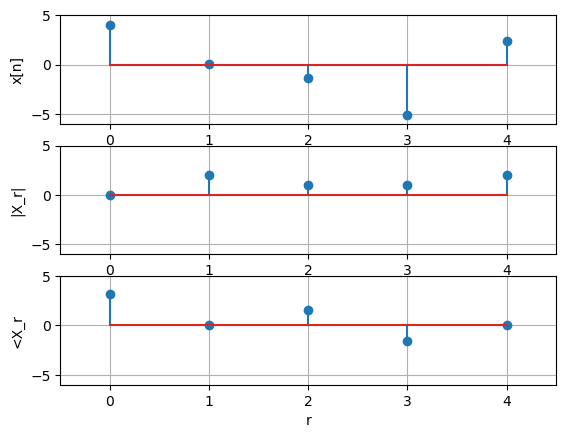

In [10]:
import numpy as np
import matplotlib.pyplot as plt

N_0 = 5
n = np.arange(0, N_0)
omega_0 = 2*np.pi/N_0
X_n = 4*np.cos(2.4*np.pi*n) + 2*np.sin(3.2*np.pi*n)

X_r = np.zeros(N_0, dtype=np.complex_)
for r in range(N_0):
    X_r[r] = np.sum(X_n*np.exp(-1j*omega_0*n*r))/N_0

r = n
plt.figure(1)
plt.subplot(311)
plt.stem(n, X_n)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.axis([-0.5, 4.5, -6, 5])
plt.grid()

plt.subplot(312)
plt.stem(r, np.abs(X_r))
plt.xlabel('r')
plt.ylabel('|X_r|')
plt.axis([-0.5, 4.5, -6, 5])
plt.grid()

plt.subplot(313)
plt.stem(r, np.angle(X_r))
plt.xlabel('r')
plt.ylabel('<X_r')
plt.axis([-0.5, 4.5, -6, 5])
plt.grid()

plt.show()


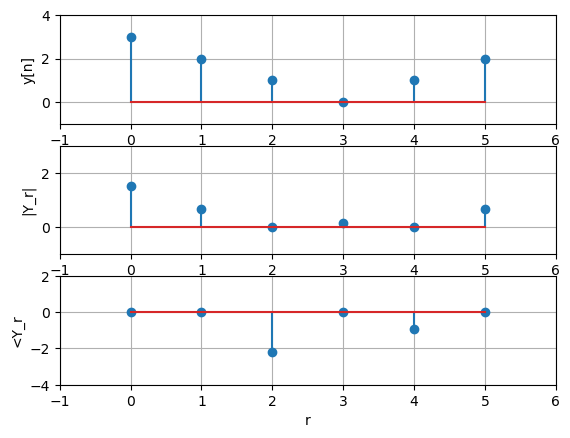

In [15]:
import numpy as np
import matplotlib.pyplot as plt

N_0 = 6
n = np.arange(0, N_0)
omega_0 = 2*np.pi/N_0
y_n = np.array([3, 2, 1, 0, 1, 2])
Y_r = np.zeros(N_0, dtype=np.complex_)

for r in range(N_0):
    Y_r[r] = np.sum(y_n*np.exp(-1j*omega_0*n*r))/N_0

r = n
plt.figure(2)
plt.subplot(311)
plt.stem(n, y_n)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.axis([-1, 6, -1, 4])
plt.grid()

plt.subplot(312)
plt.stem(r, np.abs(Y_r))
plt.xlabel('r')
plt.ylabel('|Y_r|')
plt.axis([-1, 6, -1, 3])
plt.grid()

plt.subplot(313)
plt.stem(r, np.angle(Y_r))
plt.xlabel('r')
plt.ylabel('<Y_r')
plt.axis([-1, 6, -4, 2])
plt.grid()

plt.show()


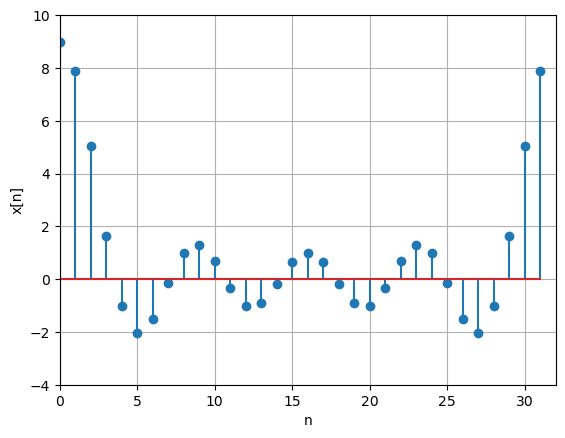

In [52]:
import numpy as np
import matplotlib.pyplot as plt

N_0 = 32
n = np.arange(0, N_0)
omega_0 = 2*np.pi/N_0
X_r = np.concatenate((np.ones(5), np.zeros(23), np.ones(4)))

x = np.zeros(N_0, dtype=np.complex_)
for r in range(N_0):
    x[r] = np.sum(X_r*np.exp(1j*r*omega_0*n))

plt.figure(3)
plt.stem(n, x)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.axis([0, 32, -4, 10])
plt.grid()
plt.show()




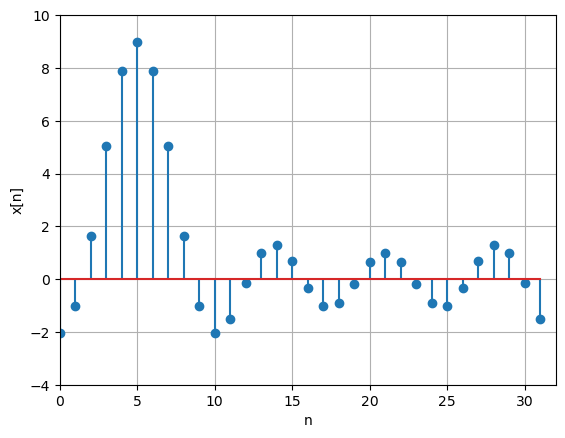

In [56]:
import numpy as np
import matplotlib.pyplot as plt

N_0 = 32
n = np.arange(0, N_0)
omega_0 = 2*np.pi/N_0
X_r = np.concatenate((np.ones(5), np.zeros(23), np.ones(4)))
X_r = X_r * np.exp(-1j*5*omega_0*n)

x = np.zeros(N_0, dtype=np.complex_)
for r in range(N_0):
    x[r] = np.sum(X_r * np.exp(1j*r*omega_0*n))

# x = np.real(np.fft.ifft(X_r)*N_0)

plt.figure(3)
plt.stem(n, x)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.axis([0, 32, -4, 10])
plt.grid()
plt.show()


/var/folders/pn/x3y1vc050ps24cnh76tdp8f80000gn/T/ipykernel_48048/2062549628.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  y1[i] = np.sum(YIr * np.exp(1j * Omega * i * n))
/var/folders/pn/x3y1vc050ps24cnh76tdp8f80000gn/T/ipykernel_48048/2062549628.py:39: ComplexWarning: Casting complex values to real discards the imaginary part
  y2[i] = np.sum(Y2r * np.exp(1j * Omega * i * n))


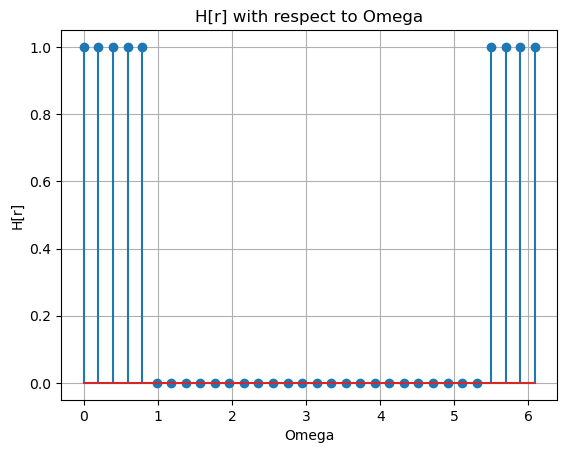

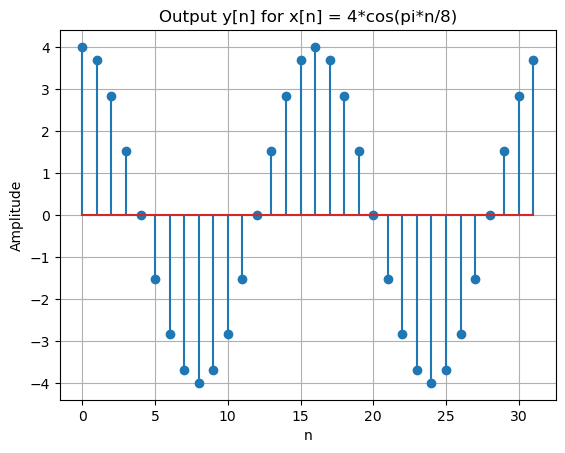

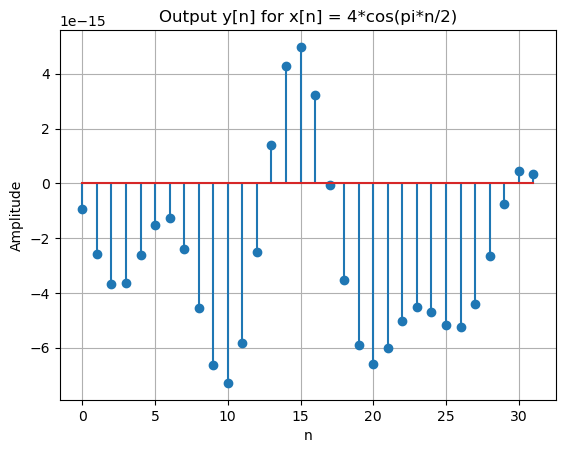

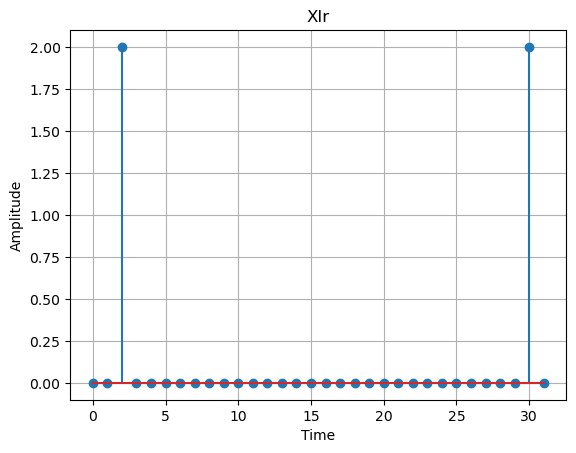

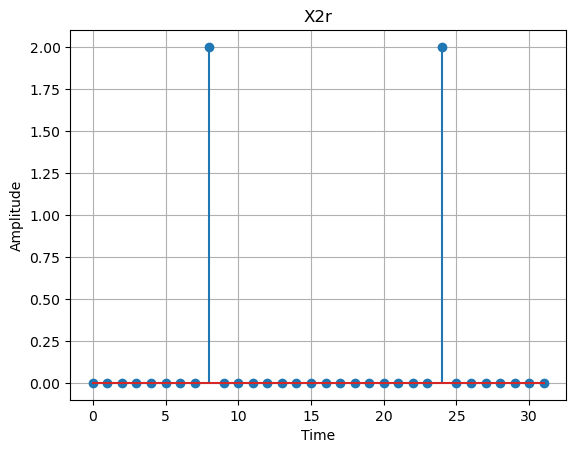

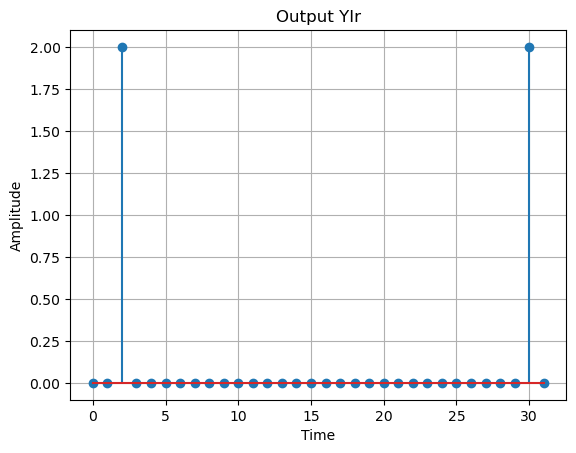

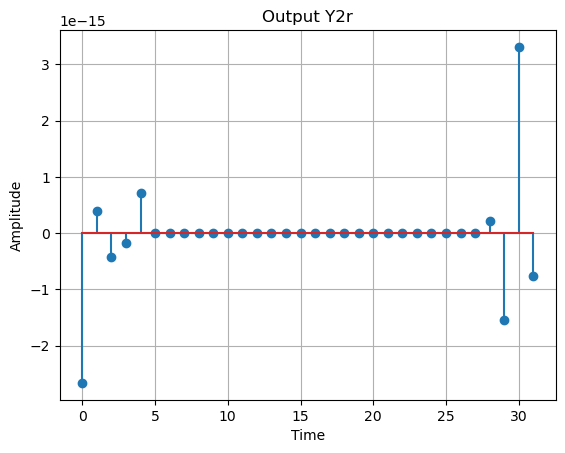

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def u(a, n):
    unit = np.ones_like(n)
    unit[n < a] = 0
    return unit

NO = 32
n = np.arange(NO)
Omega = 2 * np.pi / NO
Hr = (u(0, n) - u(5, n)) + (u(28, n) - u(33, n))

plt.figure(1)
plt.stem(n*Omega, Hr)
plt.xlabel("Omega")
plt.ylabel("H[r]")
plt.title("H[r] with respect to Omega")
plt.grid()

X1 = 4 * np.cos(np.pi * n / 8)
X2 = 4 * np.cos(np.pi * n / 2)
XIr = np.zeros(NO, complex)
X2r = np.zeros(NO, complex)
YIr = np.zeros(NO, complex)
Y2r = np.zeros(NO, complex)

for r in range(NO):
    XIr[r] = np.sum(X1 * np.exp(-1j * Omega *r* n)) / NO
    X2r[r] = np.sum(X2 * np.exp(-1j * Omega *r* n)) / NO
    YIr[r] = Hr[r] * XIr[r]
    Y2r[r] = Hr[r] * X2r[r]

y1 = np.zeros(NO)
y2 = np.zeros(NO)

for i in range(NO):
    y1[i] = np.sum(YIr * np.exp(1j * Omega * i * n))
    y2[i] = np.sum(Y2r * np.exp(1j * Omega * i * n))

plt.figure(2)
plt.stem(n, y1.real)
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.title("Output y[n] for x[n] = 4*cos(pi*n/8)")
plt.grid()

plt.figure(3)
plt.stem(n, y2.real)
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.title("Output y[n] for x[n] = 4*cos(pi*n/2)")
plt.grid()

plt.figure(4)
plt.stem(n, XIr.real)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("XIr")
plt.grid()

plt.figure(5)
plt.stem(n, X2r.real)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("X2r")
plt.grid()

plt.figure(6)
plt.stem(n, YIr.real)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Output YIr")
plt.grid()

plt.figure(7)
plt.stem(n, Y2r.real)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Output Y2r")
plt.grid()

plt.show()


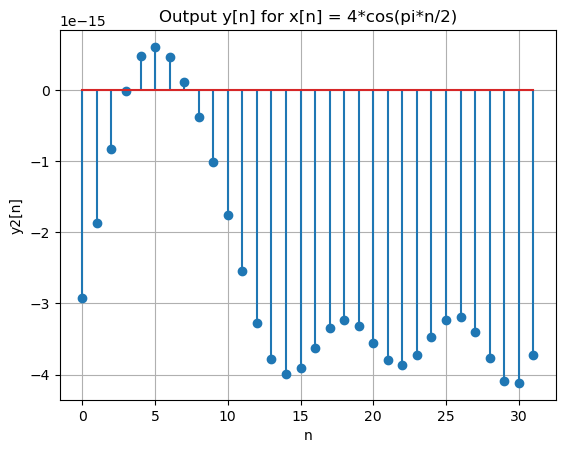

In [63]:
import matplotlib.pyplot as plt 
import numpy as np 
import scipy as SC 
from scipy import signal

No = 32
Wo = (2*np.pi)/32
n=np.arange(0,No)

x1 = 4*np.cos(np.pi*n/2)

XF = np.fft.fft(x1)
Hr = [1,1,1, 1, 1, 0,0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

Y1 = XF*Hr

y1 = np.fft.ifft(Y1)

plt.stem(n,y1)
plt.title('Output y[n] for x[n] = 4*cos(pi*n/2)')
plt.xlabel('n')
plt.ylabel('y2[n]')
plt.grid()
plt.show()